In [1]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:

img_height,img_width = (224,224)
batch_size = 32
train_data_dir = r"C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_prix\\test_resnet\\output_prix\\train"
valid_data_dir = r"C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_prix\\test_resnet\\output_prix\\val"
test_data_dir = r"C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_prix\\test_resnet\\output_prix\\test"

In [3]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

valid_generator=train_datagen.flow_from_directory(
    valid_data_dir,#same directory as training data
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')#set as validation data

Found 2237 images belonging to 3 classes.
Found 82 images belonging to 3 classes.


In [4]:
test_generator=train_datagen.flow_from_directory(
    test_data_dir,#same directory as training data
    target_size=(img_height,img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation')#set as validation data

Found 82 images belonging to 3 classes.


In [5]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [6]:
base_model = ResNet50(include_top=False,weights='imagenet',input_shape=(img_height,img_width,3))


    
x = base_model.output

x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512,activation='relu')(x)
x = Dense(64,activation='relu')(x)

for layer in base_model.layers:
    layer.trainable=False
                     
predictions = Dense(train_generator.num_classes,activation='softmax')(x)
model = Model(inputs=base_model.input ,outputs=predictions)



In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['accuracy'])
model.fit(train_generator, validation_data=valid_generator,
                         epochs = 80)

Epoch 1/80
70/70 [==============================] - 127s 2s/step - loss: 1.1103 - accuracy: 0.4573 - val_loss: 0.9356 - val_accuracy: 0.5366
Epoch 2/80
70/70 [==============================] - 60s 855ms/step - loss: 0.9446 - accuracy: 0.5539 - val_loss: 0.9505 - val_accuracy: 0.4878
Epoch 3/80
70/70 [==============================] - 68s 975ms/step - loss: 0.8781 - accuracy: 0.5937 - val_loss: 0.8673 - val_accuracy: 0.5854
Epoch 4/80
70/70 [==============================] - 72s 1s/step - loss: 0.8435 - accuracy: 0.6249 - val_loss: 0.9130 - val_accuracy: 0.5854
Epoch 5/80
70/70 [==============================] - 75s 1s/step - loss: 0.7978 - accuracy: 0.6428 - val_loss: 0.8894 - val_accuracy: 0.5610
Epoch 6/80
70/70 [==============================] - 76s 1s/step - loss: 0.7912 - accuracy: 0.6562 - val_loss: 0.8524 - val_accuracy: 0.5732
Epoch 7/80
70/70 [==============================] - 74s 1s/step - loss: 0.7441 - accuracy: 0.6723 - val_loss: 0.8918 - val_accuracy: 0.6707
Epoch 8/80
70

70/70 [==============================] - 73s 1s/step - loss: 0.1444 - accuracy: 0.9446 - val_loss: 2.3038 - val_accuracy: 0.5854
Epoch 60/80
70/70 [==============================] - 73s 1s/step - loss: 0.1993 - accuracy: 0.9312 - val_loss: 1.9004 - val_accuracy: 0.5854
Epoch 61/80
70/70 [==============================] - 74s 1s/step - loss: 0.1345 - accuracy: 0.9450 - val_loss: 1.8668 - val_accuracy: 0.6463
Epoch 62/80
70/70 [==============================] - 73s 1s/step - loss: 0.1420 - accuracy: 0.9455 - val_loss: 2.0605 - val_accuracy: 0.6341
Epoch 63/80
70/70 [==============================] - 74s 1s/step - loss: 0.1301 - accuracy: 0.9477 - val_loss: 2.4128 - val_accuracy: 0.5854
Epoch 64/80
70/70 [==============================] - 74s 1s/step - loss: 0.1340 - accuracy: 0.9517 - val_loss: 2.1439 - val_accuracy: 0.6585
Epoch 65/80
70/70 [==============================] - 73s 1s/step - loss: 0.1302 - accuracy: 0.9522 - val_loss: 2.2840 - val_accuracy: 0.6463
Epoch 66/80
70/70 [======

In [9]:
test_loss,test_acc = model.evaluate(test_generator, verbose=2)
print('\ntest accuracy:' , test_acc)

82/82 - 5s - loss: 2.0502 - accuracy: 0.5854 - 5s/epoch - 64ms/step

test accuracy: 0.5853658318519592


In [10]:
model.save('C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_prix\\save_test\\ResNet50_prix.h5' )

In [11]:
test_loss,test_acc = model.evaluate(test_generator, verbose=2)
print('\ntest accuracy:' , test_acc)

82/82 - 5s - loss: 1.8922 - accuracy: 0.6098 - 5s/epoch - 57ms/step

test accuracy: 0.6097561120986938


1/1 [==============================] - 0s 33ms/step


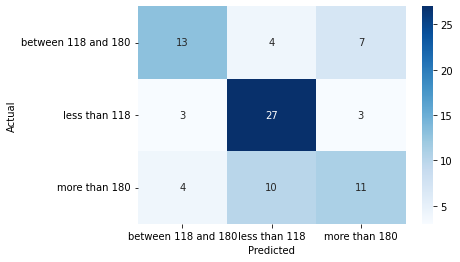

test accuracy:62.19512195121951


In [12]:
model = tf.keras.models.load_model("C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_prix\\save_test\\ResNet50_prix.h5")
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])

sns.heatmap(confusion_matrix,cmap='Blues',annot=True,fmt='d')
plt.show()
print('test accuracy:{}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [13]:
#62

In [ ]:
*************************************